# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [2]:
df_descr = pd.read_csv('data/otp_description.csv',sep='\t', encoding='utf8')

In [3]:
df_descr.head()

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"


In [4]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


In [4]:
df_descr.iloc[3]

ПОЛЕ                                        SOCSTATUS_PENS_FL
ОПИСАНИЕ    социальный статус клиента относительно пенсии ...
Name: 3, dtype: object

Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [5]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [6]:
df_train.shape

(15223, 52)

In [7]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [8]:
df_test.shape

(14910, 52)

In [9]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


In [10]:
df_test.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59909969,0,30,1,0,1,1,1,Среднее специальное,Не состоял в браке,...,0,1,2,2,8,0,0,0,0,NaN
1,59910420,0,48,0,1,1,0,0,Среднее,Состою в браке,...,0,0,2,1,15,0,0,0,0,NaN
2,59911223,0,35,1,0,0,1,0,Среднее,Не состоял в браке,...,0,1,1,1,1,0,0,0,0,NaN
3,59911322,0,22,1,0,0,0,0,Среднее,Не состоял в браке,...,0,1,3,2,9,0,0,0,0,NaN
4,59911438,0,27,1,0,1,2,2,Высшее,Состою в браке,...,0,1,1,1,5,0,0,0,0,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [11]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [12]:
df = df_test.append(df_train).reset_index(drop=True)

In [13]:
df.shape

(30133, 53)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

In [15]:
df

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED,sample
0,59909969,0,30,1,0,1,1,1,Среднее специальное,Не состоял в браке,...,1,2,2,8,0,0,0,0,NaN,test
1,59910420,0,48,0,1,1,0,0,Среднее,Состою в браке,...,0,2,1,15,0,0,0,0,NaN,test
2,59911223,0,35,1,0,0,1,0,Среднее,Не состоял в браке,...,1,1,1,1,0,0,0,0,NaN,test
3,59911322,0,22,1,0,0,0,0,Среднее,Не состоял в браке,...,1,3,2,9,0,0,0,0,NaN,test
4,59911438,0,27,1,0,1,2,2,Высшее,Состою в браке,...,1,1,1,5,0,0,0,0,NaN,test
5,59911769,0,44,0,1,0,2,2,Среднее специальное,Состою в браке,...,0,1,1,5,0,0,0,0,NaN,test
6,59912044,0,57,1,0,1,0,0,Среднее,Не состоял в браке,...,1,3,3,14,0,0,0,0,NaN,test
7,59912382,0,33,1,0,1,2,2,Среднее специальное,Разведен(а),...,1,1,1,5,0,0,0,0,NaN,test
8,59912422,0,53,0,1,1,2,0,Среднее специальное,Состою в браке,...,0,1,1,4,0,0,0,0,NaN,test
9,59912485,1,33,1,0,0,1,0,Неполное среднее,Состою в браке,...,1,1,1,6,0,0,0,0,NaN,test


### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

In [17]:
df['PERSONAL_INCOME'].head()

0     7000
1     4100
2    40000
3    20000
4    17000
Name: PERSONAL_INCOME, dtype: object

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [20]:
for i in df.columns: # перебираем все столбцы
    if df[i].dtype == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Среднее специальное', 'Среднее', 'Высшее', 'Неполное среднее', 'Ученая степень', 'Два и более высших образования', 'Неоконченное высшее'}


MARITAL_STATUS
{'Не состоял в браке', 'Вдовец/Вдова', 'Состою в браке', 'Разведен(а)', 'Гражданский брак'}


GEN_INDUSTRY
{nan, 'Металлургия/Промышленность/Машиностроение', 'Наука', 'Развлечения/Искусство', 'Информационные услуги', 'Торговля', 'Юридические услуги/нотариальные услуги', 'Транспорт', 'Энергетика', 'Государственная служба', 'СМИ/Реклама/PR-агенства', 'Нефтегазовая промышленность', 'Логистика', 'Сельское хозяйство', 'Управляющая компания', 'ЧОП/Детективная д-ть', 'Подбор персонала', 'Строительство', 'Информационные технологии', 'Страхование', 'Туризм', 'Ресторанный бизнес/Общественное питание', 'Здравоохранение', 'Коммунальное хоз-во/Дорожные службы', 'Образование', 'Сборочные производства', 'Маркетинг', 'Салоны красоты и здоровья', 'Банк/Финансы', 'Недвижимость', 'Другие сферы', 'Химия/Парфюмерия/Фармацевтика'}


GEN_TITLE


In [23]:
df['LOAN_NUM_TOTAL'].dtype

dtype('int64')

In [24]:
set(df['sample'])

{'test', 'train'}

In [25]:
df['PERSONAL_INCOME']

0         7000
1         4100
2        40000
3        20000
4        17000
5         7000
6        10000
7         7500
8         9000
9         4000
10       15000
11       12000
12        8000
13       20000
14       18500
15       14000
16        6000
17        9000
18        5000
19       15000
20        6100
21       22180
22        9000
23        8700
24        7000
25        6000
26       15000
27       12000
28       11000
29        8000
         ...  
30103    12000
30104    10000
30105    10000
30106     8000
30107    11000
30108     7000
30109    10000
30110     8000
30111    25000
30112    10000
30113    12000
30114     7000
30115    12000
30116    14500
30117    12000
30118     8000
30119     7000
30120    10000
30121    10000
30122    10000
30123    15000
30124     8100
30125     9500
30126    13000
30127    10000
30128    12000
30129    10000
30130     6000
30131     4500
30132    20000
Name: PERSONAL_INCOME, Length: 30133, dtype: object

Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [26]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')


0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
30103    12000.0
30104    10000.0
30105    10000.0
30106     8000.0
30107    11000.0
30108     7000.0
30109    10000.0
30110     8000.0
30111    25000.0
30112    10000.0
30113    12000.0
30114     7000.0
30115    12000.0
30116    14500.0
30117    12000.0
30118     8000.0
30119     7000.0
30120    10000.0
30121    10000.0
30122    10000.0
30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000

In [22]:
df['PERSONAL_INCOME'] = df['PERSONAL_INCOME'].map(lambda x: x.replace(',','.')).astype('float')
df['CREDIT'] = df['CREDIT'].map(lambda x: x.replace(',','.')).astype('float')
df['FST_PAYMENT'] = df['FST_PAYMENT'].map(lambda x: x.replace(',','.')).astype('float')
df['LOAN_AVG_DLQ_AMT'] = df['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',','.')).astype('float')
df['LOAN_MAX_DLQ_AMT'] = df['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',','.')).astype('float')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null float64
REG_ADDRESS_PR

In [27]:
df[df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float') >3]

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED,sample
0,59909969,0,30,1,0,1,1,1,Среднее специальное,Не состоял в браке,...,1,2,2,8,0,0,0,0,NaN,test
1,59910420,0,48,0,1,1,0,0,Среднее,Состою в браке,...,0,2,1,15,0,0,0,0,NaN,test
2,59911223,0,35,1,0,0,1,0,Среднее,Не состоял в браке,...,1,1,1,1,0,0,0,0,NaN,test
3,59911322,0,22,1,0,0,0,0,Среднее,Не состоял в браке,...,1,3,2,9,0,0,0,0,NaN,test
4,59911438,0,27,1,0,1,2,2,Высшее,Состою в браке,...,1,1,1,5,0,0,0,0,NaN,test
5,59911769,0,44,0,1,0,2,2,Среднее специальное,Состою в браке,...,0,1,1,5,0,0,0,0,NaN,test
6,59912044,0,57,1,0,1,0,0,Среднее,Не состоял в браке,...,1,3,3,14,0,0,0,0,NaN,test
7,59912382,0,33,1,0,1,2,2,Среднее специальное,Разведен(а),...,1,1,1,5,0,0,0,0,NaN,test
8,59912422,0,53,0,1,1,2,0,Среднее специальное,Состою в браке,...,0,1,1,4,0,0,0,0,NaN,test
9,59912485,1,33,1,0,0,1,0,Неполное среднее,Состою в браке,...,1,1,1,6,0,0,0,0,NaN,test


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null float64
REG_ADDRESS_PR

In [54]:
set(df['FACT_ADDRESS_PROVINCE'])

{'Агинский Бурятский АО',
 'Адыгея',
 'Алтайский край',
 'Амурская область',
 'Архангельская область',
 'Астраханская область',
 'Башкирия',
 'Белгородская область',
 'Брянская область',
 'Бурятия',
 'Владимирская область',
 'Волгоградская область',
 'Вологодская область',
 'Воронежская область',
 'Горный Алтай',
 'Дагестан',
 'Еврейская АО',
 'Ивановская область',
 'Иркутская область',
 'Кабардино-Балкария',
 'Калининградская область',
 'Калмыкия',
 'Калужская область',
 'Камчатская область',
 'Карачаево-Черкесия',
 'Карелия',
 'Кемеровская область',
 'Кировская область',
 'Коми',
 'Коми-Пермяцкий АО',
 'Костромская область',
 'Краснодарский край',
 'Красноярский край',
 'Курганская область',
 'Курская область',
 'Ленинградская область',
 'Липецкая область',
 'Магаданская область',
 'Марийская республика',
 'Мордовская республика',
 'Москва',
 'Московская область',
 'Мурманская область',
 'Нижегородская область',
 'Новгородская область',
 'Новосибирская область',
 'Омская область',
 '

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [37]:
df[['TARGET']]

,TARGET
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,1


In [65]:
# Есть ли пропуски в данных? - Да, т.к. количество значений в столбцах отличется, должно быть везде 30133
# Что с ними сделать?
#df[~df['PREVIOUS_CARD_NUM_UTILIZED'].isnull()] # можно применить ~[''].isnull и не выводить сроки с ними, но будет всего 600 записей из 30133

df['PREVIOUS_CARD_NUM_UTILIZED'].fillna(value=0) # заполним пустые значения нулями

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
6        0.0
7        0.0
8        0.0
9        0.0
10       0.0
11       0.0
12       0.0
13       0.0
14       0.0
15       0.0
16       0.0
17       0.0
18       0.0
19       0.0
20       0.0
21       0.0
22       0.0
23       0.0
24       0.0
25       0.0
26       0.0
27       0.0
28       0.0
29       0.0
        ... 
30103    1.0
30104    0.0
30105    0.0
30106    0.0
30107    0.0
30108    0.0
30109    1.0
30110    0.0
30111    0.0
30112    0.0
30113    0.0
30114    0.0
30115    0.0
30116    0.0
30117    0.0
30118    0.0
30119    0.0
30120    0.0
30121    0.0
30122    0.0
30123    0.0
30124    0.0
30125    0.0
30126    0.0
30127    0.0
30128    0.0
30129    0.0
30130    0.0
30131    0.0
30132    0.0
Name: PREVIOUS_CARD_NUM_UTILIZED, Length: 30133, dtype: float64

In [24]:
df['PREVIOUS_CARD_NUM_UTILIZED'].count()/df['LOAN_MAX_DLQ_AMT'].count() # доля PREVIOUS_CARD_NUM_UTILIZED - 2%

0.01991172468721999

In [76]:

df[~df['GEN_INDUSTRY'].isnull()]

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED,sample
0,59909969,0,30,1,0,1,1,1,Среднее специальное,Не состоял в браке,...,1,2,2,8,0,0,0.000000,0.00,NaN,test
2,59911223,0,35,1,0,0,1,0,Среднее,Не состоял в браке,...,1,1,1,1,0,0,0.000000,0.00,NaN,test
3,59911322,0,22,1,0,0,0,0,Среднее,Не состоял в браке,...,1,3,2,9,0,0,0.000000,0.00,NaN,test
4,59911438,0,27,1,0,1,2,2,Высшее,Состою в браке,...,1,1,1,5,0,0,0.000000,0.00,NaN,test
6,59912044,0,57,1,0,1,0,0,Среднее,Не состоял в браке,...,1,3,3,14,0,0,0.000000,0.00,NaN,test
7,59912382,0,33,1,0,1,2,2,Среднее специальное,Разведен(а),...,1,1,1,5,0,0,0.000000,0.00,NaN,test
9,59912485,1,33,1,0,0,1,0,Неполное среднее,Состою в браке,...,1,1,1,6,0,0,0.000000,0.00,NaN,test
10,59912527,0,33,1,0,0,1,1,Среднее,Состою в браке,...,1,2,1,9,0,0,0.000000,0.00,NaN,test
11,59912542,0,40,1,0,1,1,1,Среднее специальное,Состою в браке,...,1,1,1,5,0,0,0.000000,0.00,NaN,test
13,59912645,0,39,1,0,1,2,2,Высшее,Разведен(а),...,1,1,1,8,1,1,806.930000,806.93,NaN,test


#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

In [40]:
# Да, например FAMILY_INCOME {'до 5000 руб.', 'от 5000 до 10000 руб.', 'от 10000 до 20000 руб.', 'свыше 50000 руб.', 'от 20000 до 50000 руб.'}
# можно сгруппировать по нему и посчитать:
# df.groupby('FAMILY_INCOME').count()
# можно сформировать сводную таблицу с подсчетом количества респондентов:
# df1 = df.pivot_table('AGE','JOB_DIR', 'FAMILY_INCOME','count')
# можно посчитать вероятность определенного заработка с учетом сферы работы:
# df1.div(df1.sum(1),axis='rows')
# Закодируем FAMILY_INCOME с помощью OneHotEncoding
pd.get_dummies(df, columns=['FAMILY_INCOME', 'MARITAL_STATUS'])

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,GEN_INDUSTRY,...,FAMILY_INCOME_до 5000 руб.,FAMILY_INCOME_от 10000 до 20000 руб.,FAMILY_INCOME_от 20000 до 50000 руб.,FAMILY_INCOME_от 5000 до 10000 руб.,FAMILY_INCOME_свыше 50000 руб.,MARITAL_STATUS_Вдовец/Вдова,MARITAL_STATUS_Гражданский брак,MARITAL_STATUS_Не состоял в браке,MARITAL_STATUS_Разведен(а),MARITAL_STATUS_Состою в браке
0,59909969,0,30,1,0,1,1,1,Среднее специальное,Образование,...,0,1,0,0,0,0,0,1,0,0
1,59910420,0,48,0,1,1,0,0,Среднее,NaN,...,0,1,0,0,0,0,0,0,0,1
2,59911223,0,35,1,0,0,1,0,Среднее,Металлургия/Промышленность/Машиностроение,...,0,0,1,0,0,0,0,1,0,0
3,59911322,0,22,1,0,0,0,0,Среднее,Другие сферы,...,0,0,1,0,0,0,0,1,0,0
4,59911438,0,27,1,0,1,2,2,Высшее,Образование,...,0,0,1,0,0,0,0,0,0,1
5,59911769,0,44,0,1,0,2,2,Среднее специальное,NaN,...,0,1,0,0,0,0,0,0,0,1
6,59912044,0,57,1,0,1,0,0,Среднее,Сборочные производства,...,0,1,0,0,0,0,0,1,0,0
7,59912382,0,33,1,0,1,2,2,Среднее специальное,Образование,...,0,1,0,0,0,0,0,0,1,0
8,59912422,0,53,0,1,1,2,0,Среднее специальное,NaN,...,0,1,0,0,0,0,0,0,0,1
9,59912485,1,33,1,0,0,1,0,Неполное среднее,Торговля,...,0,0,0,1,0,0,0,0,0,1


#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [145]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8', decimal=',') #в том числе заменим '.' на ',' 
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8', decimal=',') #в том числе заменим '.' на ',' 
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'
df = df_test.append(df_train).reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null float64
REG_ADDRESS_PR

In [147]:
def preproc_data(df_input):
    df_output = df_input.copy()
    #удалим фичи, которых либо мало, либо повтоярющиеся в других фича (например ситуация с адресами)
    df_output = df_output.drop(['AGREEMENT_RK', 'PREVIOUS_CARD_NUM_UTILIZED', 'REG_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 'TP_PROVINCE', 'REGION_NM', 'WORK_TIME'], axis = 1)
    
    # ниже мои попытки заменить "." на "," , но ничего не получилось, пришлось пользвоаться decimal=','
    # ПОДСКАЖИТЕ, почему способы ниже не работают при одновременном вызове в функции?
    
    # df_output = df_output['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')
    # df_output = df_output['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')
    # df_output = df_output['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')
    # df_output = df_output['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    # df_output = df_output['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    
    # добавим для неработающих клиентов новое значение 'Не работает' для столбцов, связанных с их работой
    df_output.loc[:,'GEN_INDUSTRY':'JOB_DIR'] = df_output.loc[:,'GEN_INDUSTRY':'JOB_DIR'].fillna('Не работает')
    
    #кодируем категориальные признаки
    df_output = pd.get_dummies(df_output, columns=['EDUCATION', 'FAMILY_INCOME', 'MARITAL_STATUS', 'FACT_ADDRESS_PROVINCE', 'GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR'])
    
    # удаляем строки с пропусками
    # df_output = df_output.dropna()
    
    return df_output

In [150]:
df_preproc = df.pipe(preproc_data)

In [161]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Columns: 202 entries, TARGET to JOB_DIR_Юридическая служба
dtypes: float64(5), int64(31), object(1), uint8(165)
memory usage: 13.2+ MB


In [154]:
df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [158]:
df_y_train = df_train_preproc['TARGET']
df_X_train = df_train_preproc.drop(['TARGET'], axis = 1)

In [159]:
df_y_test = df_test_preproc['TARGET']
df_X_test = df_test_preproc.drop(['TARGET'], axis = 1)

In [162]:
df_train_preproc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15223 entries, 14910 to 30132
Columns: 201 entries, TARGET to JOB_DIR_Юридическая служба
dtypes: float64(5), int64(31), uint8(165)
memory usage: 6.7 MB


#### Задание 5. Обучение и оценка качества разных моделей

In [163]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42
X_train, X_test, y_train, y_test = train_test_split(df_X_train, df_y_train, test_size=0.3, random_state=42)

## Your Code Here


In [164]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4567 entries, 21229 to 25279
Columns: 200 entries, AGE to JOB_DIR_Юридическая служба
dtypes: float64(5), int64(30), uint8(165)
memory usage: 2.0 MB


In [179]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
# Постепенно мы узнаем, что они делают а сейчас учимся понимать какой работает качественнее
#     fit, 
#     predict, 
#     predict_proba

from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)
predict_LR = model_LR.predict(X_test)
predict_proba_LR = model_LR.predict_proba(X_test)
## Your Code Here

In [180]:
from sklearn.ensemble import RandomForestClassifier
model_RFC = RandomForestClassifier()
model_RFC.fit(X_train, y_train)
predict_RFC = model_RFC.predict(X_test)
predict_proba_RFC = model_RFC.predict_proba(X_test)

In [181]:
from sklearn.tree import DecisionTreeClassifier
model_DTC = DecisionTreeClassifier()
model_DTC.fit(X_train, y_train)
predict_DTC = model_DTC.predict(X_test)
predict_proba_DTC = model_DTC.predict_proba(X_test)

In [186]:
# Посчитать метрики стандартные
# accuracy, precision, recall
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# LogisticRegression()
print('precision for LR:', precision_score(y_test, predict_LR))
print('recall for LR:', recall_score(y_test, predict_LR))
print('accuracy for LR:', accuracy_score(y_test, predict_LR))
print('='*10)
# DecisionTreeClassifier()
print('precision for DTC:', precision_score(y_test, predict_DTC))
print('recall for DTC:', recall_score(y_test, predict_DTC))
print('accuracy for DTC:', accuracy_score(y_test, predict_DTC))
print('='*10)
# RandomForestClassifier()
print('precision for RFC:', precision_score(y_test, predict_RFC))
print('recall for RFC:', recall_score(y_test, predict_RFC))
print('accuracy for RFC:', accuracy_score(y_test, predict_RFC))
## Your Code Here

precision for LR: 0.3333333333333333
recall for LR: 0.0036036036036036037
accuracy for LR: 0.8780380994088023
precision for DTC: 0.17132867132867133
recall for DTC: 0.17657657657657658
accuracy for DTC: 0.7961462666958616
precision for RFC: 0.42857142857142855
recall for RFC: 0.016216216216216217
accuracy for RFC: 0.877819137289249


In [193]:

print('LogisticRegression'+'>'*5)
print(classification_report(y_test, predict_LR))
print('DecisionTreeClassifier'+'>'*5)
print(classification_report(y_test, predict_DTC))
print('RandomForestClassifier'+'>'*5)
print(classification_report(y_test, predict_RFC))


LogisticRegression>>>>>
             precision    recall  f1-score   support

          0       0.88      1.00      0.94      4012
          1       0.33      0.00      0.01       555

avg / total       0.81      0.88      0.82      4567

DecisionTreeClassifier>>>>>
             precision    recall  f1-score   support

          0       0.89      0.88      0.88      4012
          1       0.17      0.18      0.17       555

avg / total       0.80      0.80      0.80      4567

RandomForestClassifier>>>>>
             precision    recall  f1-score   support

          0       0.88      1.00      0.93      4012
          1       0.43      0.02      0.03       555

avg / total       0.83      0.88      0.82      4567



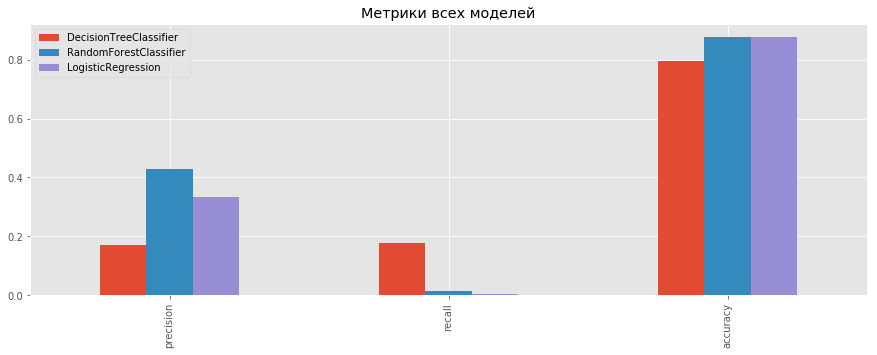

In [194]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально сравнить)
# Возможно вас удивит качество! Но задача подобрана специально ;) Такое качество тоже бывает

from matplotlib import pyplot as plt


Metric_df = pd.DataFrame(data = {'DecisionTreeClassifier':[precision_score(y_test, predict_DTC), recall_score(y_test, predict_DTC), accuracy_score(y_test, predict_DTC)],
                                 'RandomForestClassifier':[precision_score(y_test, predict_RFC), recall_score(y_test, predict_RFC), accuracy_score(y_test, predict_RFC)],
                                 'LogisticRegression': [precision_score(y_test, predict_LR), recall_score(y_test, predict_LR), accuracy_score(y_test, predict_LR)]}, 
                         index=['precision', 'recall', 'accuracy'] )

Metric_df.plot(kind='bar',title = 'Метрики всех моделей', figsize=(15,5), legend=True)
## Your Code Here

LR 0.6332673151716023    DTC 0.5292155066332535    RFC 0.5964830733026146


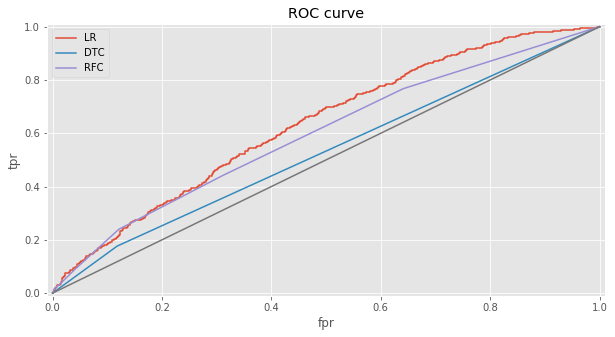

In [204]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе
# Подпишите оси и линии
from sklearn.metrics import roc_auc_score, roc_curve
roc_auc_score_LR = roc_auc_score(y_test, predict_proba_LR[:,1])
roc_auc_score_DTC = roc_auc_score(y_test, predict_proba_DTC[:,1])
roc_auc_score_RFC = roc_auc_score(y_test, predict_proba_RFC[:,1])
print('LR',roc_auc_score_LR, '   DTC', roc_auc_score_DTC, '   RFC', roc_auc_score_RFC)

%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
fpr_LR, tpr_LR, thresholds_LR = roc_curve(y_test, predict_proba_LR[:,1])
fpr_DTC, tpr_DTC, thresholds_DTC = roc_curve(y_test, predict_proba_DTC[:,1])
fpr_RFC, tpr_RFC, thresholds_RFC = roc_curve(y_test, predict_proba_RFC[:,1])
plt.figure(figsize=(10, 5))
plt.plot(fpr_LR, tpr_LR, label = 'LR')
plt.plot(fpr_DTC, tpr_DTC, label = 'DTC')
plt.plot(fpr_RFC, tpr_RFC, label = 'RFC')
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
plt.legend()
## Your Code Here

In [209]:
roc_auc_score(y_test, predict_proba_LR[:,1])

0.6332673151716023

In [196]:
from sklearn.cross_validation import cross_val_score
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc
rfc = RandomForestClassifier()
lr = LogisticRegression()
dtc = DecisionTreeClassifier()
cross_val_score_rfc = cross_val_score(
    dtc,
    X_test,
    y_test,
    scoring='roc_auc',
    cv=10
)
print('RandomForestClassifier кросс-валидация ', cross_val_score_rfc.mean())
cross_val_score_dtc = cross_val_score(
    rfc,
    X_test,
    y_test,
    scoring='roc_auc',
    cv=10
)
print('DecisionTreeClassifier кросс-валидация ', cross_val_score_dtc.mean())
cross_val_score_lr = cross_val_score(
    lr,
    X_test,
    y_test,
    scoring='roc_auc',
    cv=10
)
print('LogisticRegression кросс-валидация ', cross_val_score_lr.mean())

## Your Code Here


RandomForestClassifier кросс-валидация  0.5115637815150693
DecisionTreeClassifier кросс-валидация  0.5607613542909864
LogisticRegression кросс-валидация  0.6455255193653135


In [217]:
# Взять лучшую модель и сделать предсказания (с вероятностями (!!!)) для test выборки
df_y_test = df_test_preproc['TARGET']
df_X_test = df_test_preproc.drop('TARGET', axis = 1)
# RandomForestClassifier()
model_RFС = RandomForestClassifier()
model_RFС.fit(df_X_test, df_y_test)                                 # обучаем модель
predict_RFC_test = model_RFС.predict(df_X_test)                      # делаем предсказание
predict_proba_RFC_test = model_RFС.predict_proba(df_X_test)              # вероятность

a = predict_RFC_test.tolist()
b = predict_proba_RFC_test[:,1].tolist()
df_test = pd.DataFrame(data = {'Предсказание': a, 'Вероятность':b})
df_test

,Предсказание,Вероятность
0,0,0.1
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
5,0,0.0
6,0,0.0
7,0,0.0
8,0,0.0
9,1,0.8


0.9998126574033869


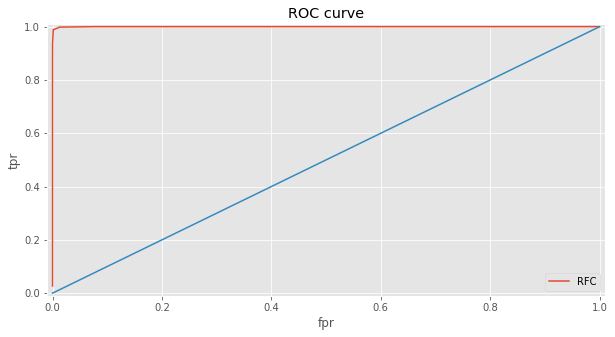

In [218]:
# Померить roc_auc на тесте
# Вывести текстом и на графике =)
roc_auc_score_RFC = roc_auc_score(df_y_test, predict_proba_RFC_test[:,1])
print(roc_auc_score_RFC) # КАК ТАК ПОЛУЧИЛОСЬ?!!!!!! почти 1 !!!!!!!????


fpr_RFC, tpr_RFC, thresholds_RFC = roc_curve(df_y_test, predict_proba_RFC_test[:,1])
plt.figure(figsize=(10, 5))
plt.plot(fpr_RFC, tpr_RFC, label = 'RFC')
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
plt.legend()
## Your Code Here

### Больше обязательных заданий нет, но ниже вы можете провести исследование, поиграться с данными
### Это возможность написать код, который я посмотрю и в случае чего откомметирую. ;)
### Это не оценивается и остается на ваше усмотрение. Просто дополнительная возможность

In [1]:
### И далее ;)